In [16]:
import torch
import mmcv
from mmdet.apis import init_detector, inference_detector
from mmengine.structures import BaseDataElement, InstanceData

from mmengine.visualization import Visualizer
from mmdet.registry import VISUALIZERS

In [5]:
from mmdet import visualization

In [2]:
cfg_file = '/home/project/MMDet/mmdetection/configs/my_config/mask2former/mask2former_swin-s-p4-w7-224_8xb2-lsj-50e_rddphcv_testsub.py'
checkpoint_file = '/home/project/host_workspace/mmdet/mask2former_swin_s_finetune2/best_coco_segm_mAP_iter_368750.pth'
model = init_detector(cfg_file, checkpoint_file, device='cuda:0')

image_path = "/home/project/host_workspace/data/test_sub1/car/polygon/images/1002.PNG"
img = mmcv.imread(image_path, channel_order='rgb')

new_result = inference_detector(model, img)
print(type(new_result))


Loads checkpoint by local backend from path: /home/project/host_workspace/mmdet/mask2former_swin_s_finetune2/best_coco_segm_mAP_iter_368750.pth


/opt/conda/envs/mmdet/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020195/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


<class 'mmdet.structures.det_data_sample.DetDataSample'>


In [92]:
img.shape

(640, 640, 3)

In [17]:
new_result.pred_instances.keys() # bboxes, labels, masks, scores
print(new_result.pred_instances.bboxes.shape)
print(new_result.pred_instances.labels.shape)
print(new_result.pred_instances.masks.shape)
print(new_result.pred_instances.scores.shape)


torch.Size([100, 4])
torch.Size([100])
torch.Size([100, 640, 640])
torch.Size([100])


In [20]:

# for vis-mmdet
def convert_to_BaseDataElement(pred_bboxes, pred_labels, pred_scores, pred_masks, only_masks=False, only_bboxes=False):
    if only_masks and only_bboxes :
        raise ValueError("Either only_masks or only_bboxes should be True")
    data_sample = BaseDataElement()
    data_sample.gt_instances = InstanceData()
    data_sample.pred_instances = InstanceData()    

    if not isinstance(pred_bboxes, torch.Tensor):
        pred_bboxes = torch.tensor(pred_bboxes, dtype=torch.float32)
        pred_labels = torch.tensor(pred_labels, dtype=torch.int64)
        pred_scores = torch.tensor(pred_scores, dtype=torch.float32)
        pred_masks = torch.tensor(pred_masks, dtype=torch.float32)
    
    data_sample.pred_instances.labels = torch.tensor(pred_labels, dtype=torch.int64)
    data_sample.pred_instances.scores = torch.tensor(pred_scores, dtype=torch.float32)
    if not only_bboxes and not only_masks:
        data_sample.pred_instances.bboxes = torch.tensor(pred_bboxes, dtype=torch.float32)
        data_sample.pred_instances.masks = torch.tensor(pred_masks, dtype=torch.float32)
        return data_sample
    elif only_bboxes:
        data_sample.pred_instances.bboxes = torch.tensor(pred_bboxes, dtype=torch.float32)
        return data_sample
    elif only_masks:
        data_sample.pred_instances.masks = torch.tensor(pred_masks, dtype=torch.float32)
        return data_sample

# # 예제: 다른 모델이 예측한 값 (N개의 바운딩 박스)
# pred_bboxes = np.array([[0, 0, 50, 50], [150, 150, 200, 200], [200, 200, 250, 250], [250, 250, 300, 300], [300, 300, 350, 350], [350, 350, 400, 400]])  # (x1, y1, x2, y2)
# pred_labels = np.array([0, 1, 2, 3, 4, 5])  # 클래스 ID
# pred_scores = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])  # 신뢰도 점수

# # mask (6, 50, 50)
# pred_masks = np.zeros((6, 640, 640))
# pred_masks[0, 0:50, 0:50] = np.random.rand(50, 50)
# pred_masks[1, 150:200, 150:200] = np.random.rand(50, 50)
# pred_masks[2, 200:250, 200:250] = np.random.rand(50, 50)
# pred_masks[3, 250:300, 250:300] = np.random.rand(50, 50)
# pred_masks[4, 300:350, 300:350] = np.random.rand(50, 50)
# pred_masks[5, 350:400, 350:400] = np.random.rand(50, 50)


pred_bboxes = new_result.pred_instances.bboxes
pred_labels = new_result.pred_instances.labels
pred_masks = new_result.pred_instances.masks
pred_scores = new_result.pred_instances.scores
new_result = convert_to_BaseDataElement(pred_bboxes, pred_labels, pred_scores, pred_masks, only_masks=True)
new_result

/tmp/ipykernel_2069/2432125008.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_sample.pred_instances.labels = torch.tensor(pred_labels, dtype=torch.int64)
/tmp/ipykernel_2069/2432125008.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_sample.pred_instances.scores = torch.tensor(pred_scores, dtype=torch.float32)
/tmp/ipykernel_2069/2432125008.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data_sample.pred_instances.masks = torch.tensor(pred_masks, dtype=torch.float32)


<BaseDataElement(

    META INFORMATION

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([1, 1, 1, 0, 5, 1, 1, 1, 1, 1, 0, 1, 1, 4, 3, 5, 0, 0, 3, 1, 3, 0, 3, 1,
                        0, 0, 1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 0, 3, 5, 0, 1, 0, 1, 4, 1, 3, 1, 1,
                        0, 1, 1, 1, 1, 1, 1, 0, 5, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 0, 1, 3, 3,
                        5, 1, 3, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 4, 0, 1, 0, 1, 4, 1, 1,
                        3, 1, 1, 0], device='cuda:0')
            masks: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
                         [0., 0., 0.,  ..., 0., 0., 0.],
                         [0., 0., 0.,  ..., 0., 0., 0.],
                         ...,
                         [0., 0., 0.,  ..., 0., 0., 0.],
                         [0., 0., 0.,  ..., 0., 0., 0.],
                         [0., 0., 0.,  ..., 0., 0., 0.]],
                
  

In [15]:
# remove bbox fields from mmengine.structures.instance_data.InstanceData






<class 'mmdet.structures.det_data_sample.DetDataSample'>


AttributeError: 'InstanceData' object has no attribute 'remove'

In [10]:

new_result.pred_instances.bboxes

tensor([[208., 385., 294., 538.],
        [  0., 264.,  89., 431.],
        [214., 251., 279., 393.],
        [553., 599., 638., 625.],
        [257., 258., 317., 536.],
        [  0., 366.,  33., 430.],
        [263., 277., 315., 532.],
        [  0., 321.,  57., 430.],
        [240., 185., 268., 275.],
        [259., 254., 290., 398.],
        [162., 324., 257., 345.],
        [276., 344., 315., 537.],
        [  0., 254.,  96., 430.],
        [  0., 254.,  96., 430.],
        [423., 449., 629., 613.],
        [423., 449., 629., 613.],
        [237., 462., 282., 507.],
        [129., 357., 236., 384.],
        [  4., 252., 151., 522.],
        [259., 251., 282., 386.],
        [154., 250., 262., 395.],
        [139., 359., 232., 384.],
        [131., 251., 289., 534.],
        [259., 250., 278., 359.],
        [115., 335., 237., 385.],
        [ 75., 252., 147., 361.],
        [ 75., 252., 147., 361.],
        [ 75., 252., 147., 361.],
        [  0., 238.,  61., 327.],
        [241.,

/opt/conda/envs/mmdet/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


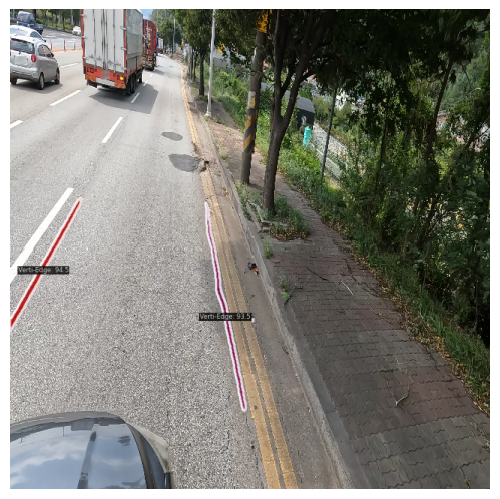

In [21]:

# get built visualizer
# visualizer_now = Visualizer.get_current_instance()
# visualizer_now = Visualizer(
#                         name="visualizer",
#                         image=img, 
#                         vis_backends=[dict(type='LocalVisBackend')],
#                         save_dir="/home/project/MMDet/vis_data")

visualizer_now = VISUALIZERS.build(model.cfg.visualizer)
visualizer_now.dataset_meta = model.dataset_meta

visualizer_now.vis_backends = [dict(type='LocalVisBackend')]
visualizer_now.save_dir = "/home/project/MMDet/vis_data"

# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer_now.dataset_meta = model.dataset_meta
# visualizer_now.set_image(image)
# show the results
visualizer_now.add_datasample(
    name='new_result',
    image=img,
    data_sample=new_result,
    draw_gt=False,
    draw_pred=True,
    show=False
)
visualizer_now.show()

# import cv2
# # 시각화된 이미지 가져오기
# drawn_img = visualizer_now.get_image()

# # 이미지 저장
# save_path = "/home/project/MMDet/visualized_result.png"
# cv2.imwrite(save_path, cv2.cvtColor(drawn_img, cv2.COLOR_RGB2BGR))

# print(f"이미지가 {save_path}에 저장되었습니다.")

In [24]:
new_result

<DetDataSample(

    META INFORMATION
    scale_factor: (1.25, 1.25)
    img_shape: (800, 800)
    img_id: 0
    ori_shape: (640, 640)
    img_path: None
    batch_input_shape: (800, 800)
    pad_shape: (800, 800)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([1, 1, 1, 0, 5, 1, 1, 1, 1, 1, 0, 1, 1, 4, 3, 5, 0, 0, 3, 1, 3, 0, 3, 1,
                        0, 0, 1, 3, 3, 1, 1, 0, 1, 1, 0, 1, 0, 3, 5, 0, 1, 0, 1, 4, 1, 3, 1, 1,
                        0, 1, 1, 1, 1, 1, 1, 0, 5, 1, 1, 1, 1, 1, 4, 1, 4, 1, 4, 1, 0, 1, 3, 3,
                        5, 1, 3, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 1, 4, 0, 1, 0, 1, 4, 1, 1,
                        3, 1, 1, 0], device='cuda:0')
            masks: tensor([[[False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, False],
                         [False, False, False,  ..., False, False, F

In [94]:
model.dataset_meta

import pickle
# save dictionary
save_path = "/home/project/MMDet/dataset_meta.pkl"
with open(save_path, "wb") as f:
    pickle.dump(model.dataset_meta, f)

save_vis_cfg = "/home/project/MMDet/vis_cfg.pkl"
with open(save_vis_cfg, "wb") as f:
    pickle.dump(model.cfg.visualizer, f)


In [81]:
import numpy as  np
from mmengine.structures import BaseDataElement, InstanceData

def convert_to_BaseDataElement(pred_bboxes, pred_labels, pred_scores, pred_masks=None):
    data_sample = BaseDataElement()
    data_sample.gt_instances = InstanceData()
    data_sample.pred_instances = InstanceData()    

    # data_sample.pred_instances.bboxes = torch.tensor(pred_bboxes, dtype=torch.float32)
    data_sample.pred_instances.labels = torch.tensor(pred_labels, dtype=torch.int64)
    data_sample.pred_instances.scores = torch.tensor(pred_scores, dtype=torch.float32)
    
    if pred_masks is not None:
        data_sample.pred_instances.masks = torch.tensor(pred_masks, dtype=torch.float32)
    
    return data_sample

# 예제: 다른 모델이 예측한 값 (N개의 바운딩 박스)
pred_bboxes = np.array([[0, 0, 50, 50], [150, 150, 200, 200], [200, 200, 250, 250], [250, 250, 300, 300], [300, 300, 350, 350], [350, 350, 400, 400]])  # (x1, y1, x2, y2)
pred_labels = np.array([0, 1, 2, 3, 4, 5])  # 클래스 ID
pred_scores = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])  # 신뢰도 점수

# mask (6, 50, 50)
pred_masks = np.zeros((6, 640, 640))
pred_masks[0, 0:50, 0:50] = np.random.rand(50, 50)
pred_masks[1, 150:200, 150:200] = np.random.rand(50, 50)
pred_masks[2, 200:250, 200:250] = np.random.rand(50, 50)
pred_masks[3, 250:300, 250:300] = np.random.rand(50, 50)
pred_masks[4, 300:350, 300:350] = np.random.rand(50, 50)
pred_masks[5, 350:400, 350:400] = np.random.rand(50, 50)



new_result = convert_to_BaseDataElement(pred_bboxes, pred_labels, pred_scores, pred_masks=pred_masks)
new_result

<BaseDataElement(

    META INFORMATION

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            labels: tensor([0, 1, 2, 3, 4, 5])
            masks: tensor([[[0.4994, 0.8197, 0.6517,  ..., 0.0000, 0.0000, 0.0000],
                         [0.0410, 0.9992, 0.5612,  ..., 0.0000, 0.0000, 0.0000],
                         [0.6506, 0.1803, 0.9115,  ..., 0.0000, 0.0000, 0.0000],
                         ...,
                         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
                         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
                         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],
                
                        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
                         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
                         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          

In [95]:
model.cfg.visualizer

{'type': 'DetLocalVisualizer',
 'vis_backends': [{'type': 'LocalVisBackend'}],
 'name': 'visualizer'}

In [31]:
type(new_result.pred_instances.bboxes)

torch.Tensor

In [82]:

from mmdet.registry import VISUALIZERS
visualizer = VISUALIZERS.build(model.cfg.visualizer)
visualizer.dataset_meta = model.dataset_meta

visualizer.vis_backends = [dict(type='LocalVisBackend')]
visualizer.save_dir = "/home/project/MMDet/vis_data"

# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

# ✅ 4. 시각화 수행 (화면 출력 X, 저장 O)
visualizer.add_datasample(
    name='external_model_result',
    image=img,  # 입력 이미지
    data_sample=new_result,
    draw_gt=False,  # GT는 없음
    draw_pred=True,  # 예측 결과만 그림
    show=False  # 화면에 출력하지 않음
)

# ✅ 5. 이미지 저장
drawn_img = visualizer.get_image()
save_path = "/home/project/MMDet/external_visualization2.png"
cv2.imwrite(save_path, cv2.cvtColor(drawn_img, cv2.COLOR_RGB2BGR))

print(f"이미지가 {save_path}에 저장되었습니다.")

이미지가 /home/project/MMDet/external_visualization2.png에 저장되었습니다.
